In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [36]:
df = pd.read_csv('US_Health_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [37]:
#males = df.loc[ df['sex'] == 'male'].copy()
#females = df.loc[ df['sex'] == 'female'].copy()
#smokers = df.loc[ df['smoker'] == 'yes'].copy()
#non_smokers = df.loc[ df['smoker'] == 'no'].copy()

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [39]:
num_col = ['age', 'bmi', 'charges']
cat_col = ['sex', 'children', 'smoker','region']

<AxesSubplot:>

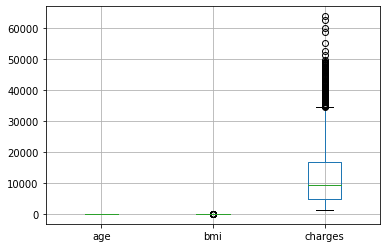

In [40]:
df.boxplot(num_col)

In [41]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
df = df.dropna(axis=0)

In [43]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<AxesSubplot:>

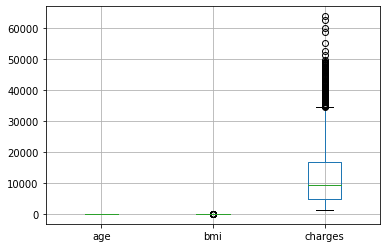

In [44]:
df.boxplot(num_col)

In [45]:
## Q1
### Null Hypothesis: There is no difference in insurance charges between smokers and non-smokers
### Alt Hypothesis: We see a difference in insurance charges betweem smokers and non-smokers

In [46]:
## From: "https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/"
Q1 = np.percentile(df['charges'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df['charges'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", df.shape)
 
# Upper bound
upper = np.where(df['charges'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['charges'] <= (Q1-1.5*IQR))

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

Old Shape:  (1338, 7)
New Shape:  (1198, 7)


C:\Users\Alpha\AppData\Local\Temp\ipykernel_3300\939478495.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['charges'], 25,
C:\Users\Alpha\AppData\Local\Temp\ipykernel_3300\939478495.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['charges'], 75,


In [47]:
smoker_charges = df.loc[ df['smoker']=='yes',"charges"]
nonsmoker_charges = df.loc[ df['smoker']=='no',"charges"]

print(f"For smokers (n={len(smoker_charges)}): Mean={np.mean(smoker_charges):.2f}")
print(f"For Non-smokers (n={len(nonsmoker_charges)}): Mean={np.mean(nonsmoker_charges):.2f}")

For smokers (n=137): Mean=21923.31
For Non-smokers (n=1061): Mean=8355.71


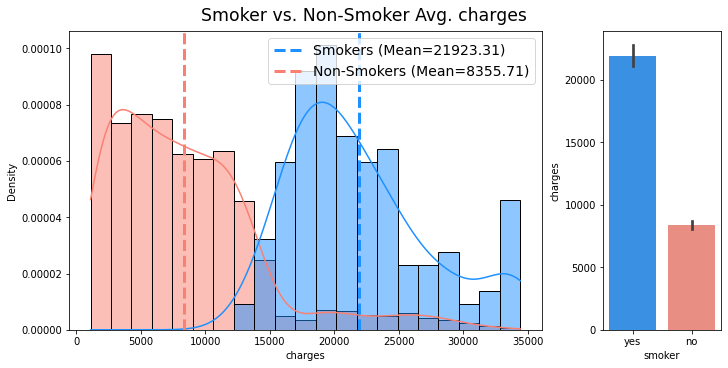

In [48]:
smoker_palette={'yes':'dodgerblue', "no":'salmon'}
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax,
                  palette=smoker_palette)
ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"Smokers (Mean={np.mean(smoker_charges):.2f})",color=smoker_palette['yes'])

ax.axvline(np.mean(nonsmoker_charges), ls='--', lw=3, 
           label=f"Non-Smokers (Mean={np.mean(nonsmoker_charges):.2f})",color=smoker_palette['no'])

ax.legend(prop={"size":14}, loc='upper right')

sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,palette=smoker_palette)
fig.suptitle('Smoker vs. Non-Smoker Avg. charges',fontsize='xx-large');

In [49]:
zscores_s = stats.zscore(smoker_charges)
outliers_s = abs(zscores_s)>3
np.sum(outliers_s)

0

In [50]:
zscores_n = stats.zscore(nonsmoker_charges)
outliers_n = abs(zscores_n)>3
np.sum(outliers_n)

26

In [51]:
nonsmoker_charges.value_counts()

1639.56310     2
1725.55230     1
8891.13950     1
2690.11380     1
26140.36030    1
              ..
11840.77505    1
10601.41200    1
7682.67000     1
10381.47870    1
2007.94500     1
Name: charges, Length: 1060, dtype: int64

In [52]:
result_s = stats.normaltest(smoker_charges)
result_s

NormaltestResult(statistic=12.919862708103514, pvalue=0.0015649031309664648)

In [53]:
result_n = stats.normaltest(nonsmoker_charges)
result_n

NormaltestResult(statistic=276.60999684673345, pvalue=8.608002116282395e-61)

In [54]:
levresult = stats.levene(smoker_charges, nonsmoker_charges)
levresult

LeveneResult(statistic=0.07804186146595886, pvalue=0.7800170690683715)

In [ ]:
## We fail to reject the null hypothesis because our P value > 0.05 after our equal variance assumption test

In [55]:
result_ttest = stats.ttest_ind(smoker_charges,nonsmoker_charges)
result_ttest

Ttest_indResult(statistic=25.88146002127965, pvalue=1.2127043831433138e-117)

In [ ]:
## P-value > 0.05 fail to reject null hypothesis

In [57]:
## is our result significant
print(f"p-value={result_ttest.pvalue:.10f}")
print(f"Significant: {result_ttest.pvalue <.05}")

p-value=0.0000000000
Significant: True


In [ ]:
##Significant result. There IS a difference between smoker and non-smoker charges

In [ ]:
## Q2
### Null Hypothesis: There is no difference between average Male smokers and average Female smokers
### Alt Hypothesis: There is a difference between average Male smokers and average Female smokers

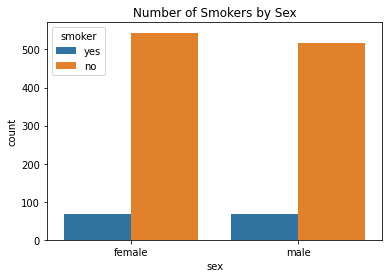

In [72]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");

In [73]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,544,68
male,517,69


In [75]:
result = stats.chi2_contingency(table)
chi2, p2, deg_free, expected_vals = result

In [77]:
print(p2)
p2<.05

0.7871669161904536


False

In [ ]:
## No significant result here; p-value > 0.05, we fail to reject the null hypothesis

In [ ]:
## Q3
### Null Hypothesis: Region does not have an effect on mean charge amount
### Alt Hypothesis: Region does not NOT have an effect on mean charge amount

In [78]:
df['region'].unique()

KeyError: 'Region'

In [79]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [81]:
groups_region = {}

for i in df['region'].unique():
    
    datar = df.loc[df['region']==i,'charges'].copy()
    
    
    groups_region[i] = datar
groups_region.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [82]:
norm_results2 = {}
for i, datar in groups_region.items():
    stat, p = stats.normaltest(datar)
    
    norm_results2[i] = {'n': len(datar),
                             'p':p,
                             'test stat':stat,}

norm_results_df2 = pd.DataFrame(norm_results2).T
norm_results_df2

,n,p,test stat
southwest,290.0,1.238405e-14,64.044734
southeast,307.0,1.433158e-11,49.937112
northwest,305.0,5.665787e-13,56.398321
northeast,296.0,3.207934e-10,43.720448


In [83]:
norm_results_df2['sig'] = norm_results_df2['p'] < .05 
norm_results_df2

,n,p,test stat,sig
southwest,290.0,1.238405e-14,64.044734,True
southeast,307.0,1.433158e-11,49.937112,True
northwest,305.0,5.665787e-13,56.398321,True
northeast,296.0,3.207934e-10,43.720448,True


In [ ]:
##We can confirm that each group does not have a normal distribution; p value < 0.05

In [ ]:
##Now testing assumption of equal variance

In [84]:
stats.levene(*groups_region.values())

LeveneResult(statistic=3.211115382591314, pvalue=0.022304148632917083)

In [ ]:
#We reject the null hypothesis because our P value > 0.05 after our equal variance assumption test

In [85]:
values = df['charges']
labels = df['region']

In [86]:
result_f = stats.f_oneway( *groups_region.values())
result_f

F_onewayResult(statistic=3.718328444443425, pvalue=0.011156788785119389)

In [89]:
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-372.6698,0.9205,-1880.8152,1135.4756,False
northeast,southeast,-1161.982,0.194,-2667.706,343.7419,False
northeast,southwest,-1802.5751,0.013,-3329.8096,-275.3407,True
northwest,southeast,-789.3122,0.5256,-2283.683,705.0585,False
northwest,southwest,-1429.9053,0.0727,-2945.9476,86.137,False
southeast,southwest,-640.5931,0.6965,-2154.2266,873.0404,False


In [ ]:
## We do not see significant differences between the different sets of groups here and p values are all > 0.05 so I would conclude that this test indicates that we reject our null hypthosis in this case.